In [1]:
import pandas as pd
import numpy as np
import math
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import Normalizer
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import re

In [2]:
# Who is the best Overall Player?

# Find out the best player on each team to trade based on salary, contract, and skills.

# Rank players by overall value and averge contract cost to determine which player of the best value

# Which skill has the greatest impact on thier overall rating?

# Which teams have the best "Bang for their buck roster", and who has "Mistakenly overpaid"?

# Which player is the most overated based on contact avg/skill?

# Which club has the most espensive roster and least expensive?

# Which player has the best overall value based on age?

# Which is the best player by position?

# Which is the cheapest by position? Most Expensive?

# Rank by left and right footed players. Who is better? What are they better at?

# Which club has the most left footed players?

# Which country has the most left footed players?

# Do players have better skills ins certain area depending on what country they are from?

# Which country produces the most players at each position?

# What country prodoces the best athletes?

# What country produces the worst?

# Which country has the most expensive athletes? Which are the cheapest?

# Which Club has made the best overall decisons financially?


In [3]:
fifa21 = pd.read_csv('/Users/dchrobak/Desktop/fifa21_male2.csv')

In [4]:
# read it

In [5]:
fifa21.head()

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          Club Logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                Flag Photo  POT            Team & Contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  Height  Weight   foot  Growth        Joined Loan Date End  Value  Wage  \
0   6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
1  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
2   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
3  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

  Release Clause     Contract  Attacking  Crossing  Finishing  \
0             €0  2008 ~ 2016        313        75         50   
1          €1.1M  2014 ~ 2019        337        68         64   
2             €0  2016 ~ 2020        337        80         64   
3             €0         2009        264        54         70   
4          €7.2M  2018 ~ 2021        367        75         69   

   Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
0           60            69            71       347            68   
1           79            71            71       305            56   
2           77            69            78       295            48   
3           46            64            77       176            59   
4           70            83            90       346            61   

   Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   Stamina  Strength  Long Shots  Mentality  Aggression  Interceptions  \
0       69        68          68        320          72           69

In [6]:
fifa21['ST']

0        65+0
1        67+1
2        64+0
3        67+0
4        72+3
         ... 
17120    43+2
17121    53+2
17122    46+2
17123    48+2
17124    59+2
Name: ST, Length: 17125, dtype: object

In [7]:
fifa21.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

In [8]:
# standarize header names to make it easier to code

In [9]:
fifa21 = fifa21.rename(columns=str.lower)

In [10]:
fifa21.columns

Index(['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp',
       'position', 'player photo',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'],
      dtype='object', length=107)

In [11]:
# find locations of certain columns and drop (ls and gk)

In [12]:
fifa21.columns.get_loc('ls')

79

In [13]:
fifa21.columns.get_loc('gk')

105

In [14]:
fifa21.drop(fifa21.iloc[:, 79:105], axis = 1, inplace = True)

In [15]:
fifa21['gk'].isnull().sum()

0

In [16]:
fifa21.dtypes

id              int64
name           object
age             int64
ova             int64
nationality    object
                ...  
def             int64
phy             int64
hits           object
gk             object
gender         object
Length: 81, dtype: object

In [17]:
def fix_gk(GK):
    gk2 = re.findall('\d+', GK)
    i = int(gk2[0])+ int(gk2[1])
    return i

In [18]:
fifa21['gk'] = list(map(fix_gk, fifa21['gk']))

In [19]:
fifa21

id             name  age  ova            nationality  \
0           2      G. Pasquale   33   69                  Italy   
1          16      Luis García   37   71                  Spain   
2          27          J. Cole   33   71                England   
3          36         D. Yorke   36   68  Trinidad &amp; Tobago   
4          41          Iniesta   36   81                  Spain   
...       ...              ...  ...  ...                    ...   
17120  259088       A. Medioub   22   64                 France   
17121  259090       W. Rickard   18   56                  Wales   
17122  259091       C. Barrett   18   56                England   
17123  259101   J. Gazibegović   20   62     Bosnia Herzegovina   
17124  259105  Pablo Rodríguez   18   59                  Spain   

                club  bov   bp      position  \
0            Udinese   71  LWB            LM   
1          KAS Eupen   70   CM    CM CAM CDM   
2      Coventry City   71  CAM  CAM RM RW LM   
3         Sunderland   70   ST           NaN   
4        Vissel Kobe   82  CAM        CM CAM   
...              ...  ...  ...           ...   
17120     CD Tondela   66   CB            CB   
17121        Burnley   58  CAM        CAM CM   
17122        Burnley   56   RB            RB   
17123  SK Sturm Graz   62   RB         RB LB   
17124          Lecce   61   ST            ST   

                                            player photo  \
0      https://cdn.sofifa.com/players/000/002/16_120.png   
1      https://cdn.sofifa.com/players/000/016/19_120.png   
2      https://cdn.sofifa.com/players/000/027/16_120.png   
3      https://cdn.sofifa.com/players/000/036/09_120.png   
4      https://cdn.sofifa.com/players/000/041/20_120.png   
...                                                  ...   
17120  https://cdn.sofifa.com/players/259/088/20_120.png   
17121  https://cdn.sofifa.com/players/259/090/20_120.png   
17122  https://cdn.sofifa.com/players/259/091/20_120.png   
17123  https://cdn.sofifa.com/players/259/101/20_120.png   
17124  https://cdn.sofifa.com/players/259/105/20_120.png   

                                              club logo  \
0          https://cdn.sofifa.com/teams/55/light_60.png   
1        https://cdn.sofifa.com/teams/2013/light_60.png   
2        https://cdn.sofifa.com/teams/1800/light_60.png   
3         https://cdn.sofifa.com/teams/106/light_60.png   
4      https://cdn.sofifa.com/teams/101146/light_60.png   
...                                                 ...   
17120  https://cdn.sofifa.com/teams/112516/light_60.png   
17121    https://cdn.sofifa.com/teams/1796/light_60.png   
17122    https://cdn.sofifa.com/teams/1796/light_60.png   
17123     https://cdn.sofifa.com/teams/209/light_60.png   
17124     https://cdn.sofifa.com/teams/347/light_60.png   

                                    flag photo  pot  \
0          https://cdn.sofifa.com/flags/it.png   69   
1          https://cdn.sofifa.com/flags/es.png   71   
2      https://cdn.sofifa.com/flags/gb-eng.png   71   
3          https://cdn.sofifa.com/flags/tt.png   82   
4          https://cdn.sofifa.com/flags/es.png   81   
...                                        ...  ...   
17120      https://cdn.sofifa.com/flags/fr.png   69   
17121  https://cdn.sofifa.com/flags/gb-wls.png   66   
17122  https://cdn.sofifa.com/flags/gb-eng.png   67   
17123      https://cdn.sofifa.com/flags/ba.png   73   
17124      https://cdn.sofifa.com/flags/es.png   74   

                       team & contract height  weight   foot  growth  \
0                  Udinese 2008 ~ 2016   6'0"  181lbs   Left       0   
1                KAS Eupen 2014 ~ 2019  5'10"  143lbs  Right       0   
2            Coventry City 2016 ~ 2020   5'9"  161lbs  Right       0   
3                      Sunderland 2009  5'11"  165lbs  Right      14   
4              Vissel Kobe 2018 ~ 2021   5'7"  150lbs  Right       0   
...                                ...    ...     ...    ...     ...   
17120  CD Tondela Jun 30, 2021 On 

In [20]:
fifa21.columns

Index(['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp',
       'position', 'player photo', 'club logo', 'flag photo', 'pot',
       'team & contract', 'height', 'weight', 'foot', 'growth', 'joined',
       'loan date end', 'value', 'wage', 'release clause', 'contract',
       'attacking', 'crossing', 'finishing', 'heading accuracy',
       'short passing', 'volleys', 'skill', 'dribbling', 'curve',
       'fk accuracy', 'long passing', 'ball control', 'movement',
       'acceleration', 'sprint speed', 'agility', 'reactions', 'balance',
       'power', 'shot power', 'jumping', 'stamina', 'strength', 'long shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing tackle',
       'sliding tackle', 'goalkeeping', 'gk diving', 'gk handling',
       'gk kicking', 'gk positioning', 'gk reflexes', 'total stats',
       'base stats', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'pac', 'sho', 'pas',
  

In [21]:
pd.set_option('display.max_columns', None) 

In [22]:
print(fifa21.dtypes)

id              int64
name           object
age             int64
ova             int64
nationality    object
                ...  
def             int64
phy             int64
hits           object
gk              int64
gender         object
Length: 81, dtype: object


In [23]:
fifa21.drop(['id', 'joined', 'gender', 'name', 'club', 'nationality', 'contract', 'release clause', 'wage', 'value', 'growth', 'position', 'loan date end', 'player photo', 'club logo', 'flag photo', 'team & contract', 'a/w', 'd/w'], inplace = True, axis = 1)

In [24]:
# dropping more columns ('id, joined, gender, name, club, nationality, contact, 
#release clause, wage, value, growth, position, loan date end, 
#player photo, club logo, flag photo, team & contract, a/w, d/w,

#19 columns deleted

In [25]:
# removing the stars

In [26]:
fifa21['ir'] = fifa21['ir'].replace('\s\D','', regex = True)

In [27]:
fifa21.shape

(17125, 62)

In [28]:
fifa21['w/f'] = fifa21['w/f'].replace('\s\D','', regex = True)

In [29]:
fifa21['sm'] = fifa21['sm'].replace('\D','', regex = True)

In [30]:
fifa21['sm'] = pd.to_numeric(fifa21['sm'])

In [31]:
fifa21['w/f'] = pd.to_numeric(fifa21['w/f'])

In [32]:
fifa21['ir'] = pd.to_numeric(fifa21['ir'])

In [33]:
fifa21

age  ova  bov   bp  pot height  weight   foot  attacking  crossing  \
0       33   69   71  LWB   69   6'0"  181lbs   Left        313        75   
1       37   71   70   CM   71  5'10"  143lbs  Right        337        68   
2       33   71   71  CAM   71   5'9"  161lbs  Right        337        80   
3       36   68   70   ST   82  5'11"  165lbs  Right        264        54   
4       36   81   82  CAM   81   5'7"  150lbs  Right        367        75   
...    ...  ...  ...  ...  ...    ...     ...    ...        ...       ...   
17120   22   64   66   CB   69   6'6"  165lbs  Right        197        35   
17121   18   56   58  CAM   66  5'10"  170lbs  Right        248        50   
17122   18   56   56   RB   67   5'9"  154lbs  Right        218        55   
17123   20   62   62   RB   73   5'9"  148lbs  Right        223        62   
17124   18   59   61   ST   74  5'10"  154lbs  Right        254        32   

       finishing  heading accuracy  short passing  volleys  skill  dribbling  \
0             50                59             71     58.0    338         73   
1             64                61             76     68.0    369         69   
2             64                41             77     75.0    387         79   
3             70                60             80      NaN    255         68   
4             69                54             90     79.0    408         85   
...          ...               ...            ...      ...    ...        ...   
17120         23                66             47     26.0    193         44   
17121         43                50             64     41.0    264         57   
17122         34                53             42     34.0    212         52   
17123         26                52             60     23.0    258         55   
17124         64                59             45     54.0    235         57   

       curve  fk accuracy  long passing  ball control  movement  acceleration  \
0       65.0           60            69            71       347            68   
1       79.0           79            71            71       305            56   
2       84.0           77            69            78       295            48   
3        NaN           46            64            77       176            59   
4       80.0           70            83            90       346            61   
...      ...          ...           ...           ...       ...           ...   
17120   26.0           33            34            56       243            52   
17121   42.0           50            61            54       298            61   
17122   43.0           34            36            47       308            66   
17123   43.0           46            57            57       349            72   
17124   45.0           48            30            55       317            68   

       sprint speed  agility  reactions  balance  power  shot power  jumping  \
0                74     68.0         69     68.0    347          74     68.0   
1                50     62.0         65     72.0    324          75     54.0   
2                42     71.0         59     75.0    284          72     58.0   
3                62      NaN         55      NaN    239          63      NaN   
4                56     79.0         75     75.0    297          67     40.0   
...             ...      ...        ...      ...    ...         ...      ...   
17120            55     46.0         48     42.0    279          48     70.0   
17121            63     52.0         54     68.0    271          51     62.0   
17122            61     54.0         59     68.0    233          28     61.0   
17123            70     74.0         56     77.0    261          51     72.0   
17124            72     59.0         53     65.0    288          58     62.0   

       stamina  strength  long shots  mentality  aggression  interceptions  \
0           69        68          68        320          72           69.0   
1           64        60       

In [34]:
fifa21.head()

age  ova  bov   bp  pot height  weight   foot  attacking  crossing  \
0   33   69   71  LWB   69   6'0"  181lbs   Left        313        75   
1   37   71   70   CM   71  5'10"  143lbs  Right        337        68   
2   33   71   71  CAM   71   5'9"  161lbs  Right        337        80   
3   36   68   70   ST   82  5'11"  165lbs  Right        264        54   
4   36   81   82  CAM   81   5'7"  150lbs  Right        367        75   

   finishing  heading accuracy  short passing  volleys  skill  dribbling  \
0         50                59             71     58.0    338         73   
1         64                61             76     68.0    369         69   
2         64                41             77     75.0    387         79   
3         70                60             80      NaN    255         68   
4         69                54             90     79.0    408         85   

   curve  fk accuracy  long passing  ball control  movement  acceleration  \
0   65.0           60            69            71       347            68   
1   79.0           79            71            71       305            56   
2   84.0           77            69            78       295            48   
3    NaN           46            64            77       176            59   
4   80.0           70            83            90       346            61   

   sprint speed  agility  reactions  balance  power  shot power  jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   stamina  strength  long shots  mentality  aggression  interceptions  \
0       69        68          68        320          72           69.0   
1       64        60          71        362          71           71.0   
2       29        56          69        317          69           39.0   
3       51        66          59        271          59           70.0   
4       58        62          70        370          58           70.0   

   positioning  vision  penalties  composure  defending  marking  \
0         63.0    66.0         50        NaN        208       70   
1         72.0    73.0         75       79.0        153       70   
2         69.0    74.0         66        NaN         99       35   
3         72.0     NaN         70        NaN         75       34   
4         78.0    93.0         71       89.0        181       68   

   standing tackle  sliding tackle  goalkeeping  gk diving  gk handling  \
0               69            69.0           56         14            5   
1               43            40.0           56          9           12   
2               34            30.0           51          9            6   
3               41             NaN           68          5           21   
4               57            56.0           45          6           13   

   gk kicking  gk positioning  gk reflexes  total stats  base stats  w/f  sm  \
0          15              10           12         1929         408    3   2   
1          13              11           11         1906         385    4   3   
2          13              16            7         1770         354    4   4   
3          64              21           21         1348         369    3   1   
4           6              13            7         2014         420    4   4   

   ir  pac  sho  pas  dri  def  phy hits  gk  
0   2   71   59   70   71   68   69    4  17  
1   1   53   69   73   69   58   63    4  18  
2   2   45   68   76   77   36   52   11  15  
3   1   61   66   66   69   47   60    3  22  
4   4   58   70   85   85   63   59  149  20

In [35]:
fifa21.dtypes

age      int64
ova      int64
bov      int64
bp      object
pot      int64
         ...  
dri      int64
def      int64
phy      int64
hits    object
gk       int64
Length: 62, dtype: object

In [36]:
fifa21.duplicated().sum()

0

In [37]:
# this is good :)

In [38]:
fifa21.describe().columns

Index(['age', 'ova', 'bov', 'pot', 'attacking', 'crossing', 'finishing',
       'heading accuracy', 'short passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk accuracy', 'long passing', 'ball control', 'movement',
       'acceleration', 'sprint speed', 'agility', 'reactions', 'balance',
       'power', 'shot power', 'jumping', 'stamina', 'strength', 'long shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing tackle',
       'sliding tackle', 'goalkeeping', 'gk diving', 'gk handling',
       'gk kicking', 'gk positioning', 'gk reflexes', 'total stats',
       'base stats', 'w/f', 'sm', 'ir', 'pac', 'sho', 'pas', 'dri', 'def',
       'phy', 'gk'],
      dtype='object')

In [39]:
fifa21.columns.unique().isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [40]:
# checking nulls

In [41]:
fifa21.columns

Index(['age', 'ova', 'bov', 'bp', 'pot', 'height', 'weight', 'foot',
       'attacking', 'crossing', 'finishing', 'heading accuracy',
       'short passing', 'volleys', 'skill', 'dribbling', 'curve',
       'fk accuracy', 'long passing', 'ball control', 'movement',
       'acceleration', 'sprint speed', 'agility', 'reactions', 'balance',
       'power', 'shot power', 'jumping', 'stamina', 'strength', 'long shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing tackle',
       'sliding tackle', 'goalkeeping', 'gk diving', 'gk handling',
       'gk kicking', 'gk positioning', 'gk reflexes', 'total stats',
       'base stats', 'w/f', 'sm', 'ir', 'pac', 'sho', 'pas', 'dri', 'def',
       'phy', 'hits', 'gk'],
      dtype='object')

In [42]:
# replacing null values

In [43]:
fifa21.volleys

0        58.0
1        68.0
2        75.0
3         NaN
4        79.0
         ... 
17120    26.0
17121    41.0
17122    34.0
17123    23.0
17124    54.0
Name: volleys, Length: 17125, dtype: float64

In [44]:
fifa21['volleys'].head()

0    58.0
1    68.0
2    75.0
3     NaN
4    79.0
Name: volleys, dtype: float64

In [45]:
avg = np.mean(fifa21['volleys'])
fifa21['volleys'] = fifa21['volleys'].fillna(avg)

In [46]:
avg = np.mean(fifa21['curve'])
fifa21['curve'] = fifa21['curve'].fillna(avg)

In [47]:
fifa21.agility

0        68.0
1        62.0
2        71.0
3         NaN
4        79.0
         ... 
17120    46.0
17121    52.0
17122    54.0
17123    74.0
17124    59.0
Name: agility, Length: 17125, dtype: float64

In [48]:
avg = np.mean(fifa21['agility'])
fifa21['agility'] = fifa21['agility'].fillna(avg)

In [49]:
fifa21.jumping

0        68.0
1        54.0
2        58.0
3         NaN
4        40.0
         ... 
17120    70.0
17121    62.0
17122    61.0
17123    72.0
17124    62.0
Name: jumping, Length: 17125, dtype: float64

In [50]:
avg = np.mean(fifa21['jumping'])
fifa21['jumping'] = fifa21['jumping'].fillna(avg)

In [51]:
fifa21.vision

0        66.0
1        73.0
2        74.0
3         NaN
4        93.0
         ... 
17120    29.0
17121    53.0
17122    45.0
17123    56.0
17124    50.0
Name: vision, Length: 17125, dtype: float64

In [52]:
avg = np.mean(fifa21['vision'])
fifa21['vision'] = fifa21['vision'].fillna(avg)

In [53]:
avg = np.mean(fifa21['positioning'])
fifa21['positioning'] = fifa21['positioning'].fillna(avg)

In [54]:
fifa21.interceptions

0        69.0
1        71.0
2        39.0
3        70.0
4        70.0
         ... 
17120    58.0
17121    50.0
17122    55.0
17123    58.0
17124    11.0
Name: interceptions, Length: 17125, dtype: float64

In [55]:
avg = np.mean(fifa21['interceptions'])
fifa21['interceptions'] = fifa21['interceptions'].fillna(avg)

In [56]:
fifa21.balance

0        68.0
1        72.0
2        75.0
3         NaN
4        75.0
         ... 
17120    42.0
17121    68.0
17122    68.0
17123    77.0
17124    65.0
Name: balance, Length: 17125, dtype: float64

In [57]:
avg = np.mean(fifa21['balance'])
fifa21['balance'] = fifa21['balance'].fillna(avg)

In [58]:
fifa21.composure

0         NaN
1        79.0
2         NaN
3         NaN
4        89.0
         ... 
17120    46.0
17121    46.0
17122    43.0
17123    54.0
17124    57.0
Name: composure, Length: 17125, dtype: float64

In [59]:
avg = np.mean(fifa21['composure'])
fifa21['composure'] = fifa21['composure'].fillna(avg)

In [60]:
avg = np.mean(fifa21['sliding tackle'])
fifa21['sliding tackle'] = fifa21['sliding tackle'].fillna(avg)

In [61]:
fifa21.isnull().sum()

age     0
ova     0
bov     0
bp      0
pot     0
       ..
dri     0
def     0
phy     0
hits    0
gk      0
Length: 62, dtype: int64

In [62]:
# Converting obj to Int

In [63]:
fifa21.height

0         6'0"
1        5'10"
2         5'9"
3        5'11"
4         5'7"
         ...  
17120     6'6"
17121    5'10"
17122     5'9"
17123     5'9"
17124    5'10"
Name: height, Length: 17125, dtype: object

In [64]:
def fix_height(h):
    h2 = re.findall('\d+',h)
    i = int(h2[0])*12 + int(h2[1])
    return i

In [65]:
fifa21['height'] = list(map(fix_height, fifa21['height']))

In [66]:
fifa21['height'].head(5)

0    72
1    70
2    69
3    71
4    67
Name: height, dtype: int64

In [67]:
fifa21['height'].value_counts()

72    2583
70    2418
69    2027
71    1944
74    1878
73    1805
68     960
75     953
67     893
76     719
66     307
77     254
65     185
78     111
64      28
79      27
80      12
63      12
62       5
81       2
61       2
Name: height, dtype: int64

In [68]:
fifa21.bp.unique()

array(['LWB', 'CM', 'CAM', 'ST', 'RW', 'CB', 'CF', 'GK', 'CDM', 'RWB',
       'LB', 'LM', 'RM', 'RB', 'LW'], dtype=object)

In [69]:
type(['weight'])

list

In [70]:
fifa21['weight'] = fifa21['weight'].replace('\D','', regex = True)

In [71]:
fifa21['weight'] = pd.to_numeric(fifa21['weight'], errors = 'raise')

In [72]:
fifa21['hits'] = fifa21['hits'].replace('\D$','', regex = True)

In [73]:
fifa21['hits'] = pd.to_numeric(fifa21['hits'])

In [74]:
fifa21['hits'][1612]

6.3

In [75]:
fifa21.dtypes

age       int64
ova       int64
bov       int64
bp       object
pot       int64
         ...   
dri       int64
def       int64
phy       int64
hits    float64
gk        int64
Length: 62, dtype: object

In [76]:
fifa21

age  ova  bov   bp  pot  height  weight   foot  attacking  crossing  \
0       33   69   71  LWB   69      72     181   Left        313        75   
1       37   71   70   CM   71      70     143  Right        337        68   
2       33   71   71  CAM   71      69     161  Right        337        80   
3       36   68   70   ST   82      71     165  Right        264        54   
4       36   81   82  CAM   81      67     150  Right        367        75   
...    ...  ...  ...  ...  ...     ...     ...    ...        ...       ...   
17120   22   64   66   CB   69      78     165  Right        197        35   
17121   18   56   58  CAM   66      70     170  Right        248        50   
17122   18   56   56   RB   67      69     154  Right        218        55   
17123   20   62   62   RB   73      69     148  Right        223        62   
17124   18   59   61   ST   74      70     154  Right        254        32   

       finishing  heading accuracy  short passing    volleys  skill  \
0             50                59             71  58.000000    338   
1             64                61             76  68.000000    369   
2             64                41             77  75.000000    387   
3             70                60             80  45.005742    255   
4             69                54             90  79.000000    408   
...          ...               ...            ...        ...    ...   
17120         23                66             47  26.000000    193   
17121         43                50             64  41.000000    264   
17122         34                53             42  34.000000    212   
17123         26                52             60  23.000000    258   
17124         64                59             45  54.000000    235   

       dribbling      curve  fk accuracy  long passing  ball control  \
0             73  65.000000           60            69            71   
1             69  79.000000           79            71            71   
2             79  84.000000           77            69            78   
3             68  49.574676           46            64            77   
4             85  80.000000           70            83            90   
...          ...        ...          ...           ...           ...   
17120         44  26.000000           33            34            56   
17121         57  42.000000           50            61            54   
17122         52  43.000000           34            36            47   
17123         55  43.000000           46            57            57   
17124         57  45.000000           48            30            55   

       movement  acceleration  sprint speed    agility  reactions    balance  \
0           347            68            74  68.000000         69  68.000000   
1           305            56            50  62.000000         65  72.000000   
2           295            48            42  71.000000         59  75.000000   
3           176            59            62  64.602273         55  64.715591   
4           346            61            56  79.000000         75  75.000000   
...         ...           ...           ...        ...        ...        ...   
17120       243            52            55  46.000000         48  42.000000   
17121       298            61            63  52.000000         54  68.000000   
17122       308            66            61  54.000000         59  68.000000   
17123       349            72            70  74.000000         56  77.000000   
17124       317            68            72  59.000000         53  65.000000   

       power  shot power    jumping  stamina  strength  long shots  mentality  \
0        347          74  68.000000       69        68          68        320   
1        324          75  54.000000       64        60          71        362   
2        284          72  58.000000       29        56          69        317   
3        239          63  65.170212       51        66          59 

In [77]:
fifa21.dtypes

age       int64
ova       int64
bov       int64
bp       object
pot       int64
         ...   
dri       int64
def       int64
phy       int64
hits    float64
gk        int64
Length: 62, dtype: object

In [78]:
fifa21.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [79]:
# seperating the data 

In [80]:
numerical = fifa21.select_dtypes(include = np.number)

In [81]:
categorical  = fifa21.select_dtypes(np.object)

In [82]:
categorical.shape

(17125, 2)

In [83]:
categorical.columns

Index(['bp', 'foot'], dtype='object')

In [84]:
categorical.head()

bp   foot
0  LWB   Left
1   CM  Right
2  CAM  Right
3   ST  Right
4  CAM  Right

In [85]:
numerical.shape

(17125, 60)

In [86]:
numerical.info

<bound method DataFrame.info of        age  ova  bov  pot  height  weight  attacking  crossing  finishing  \
0       33   69   71   69      72     181        313        75         50   
1       37   71   70   71      70     143        337        68         64   
2       33   71   71   71      69     161        337        80         64   
3       36   68   70   82      71     165        264        54         70   
4       36   81   82   81      67     150        367        75         69   
...    ...  ...  ...  ...     ...     ...        ...       ...        ...   
17120   22   64   66   69      78     165        197        35         23   
17121   18   56   58   66      70     170        248        50         43   
17122   18   56   56   67      69     154        218        55         34   
17123   20   62   62   73      69     148        223        62         26   
17124   18   59   61   74      70     154        254        32         64   

       heading accuracy  short passing    v

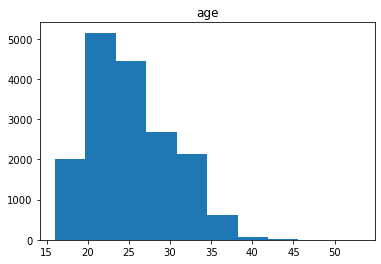

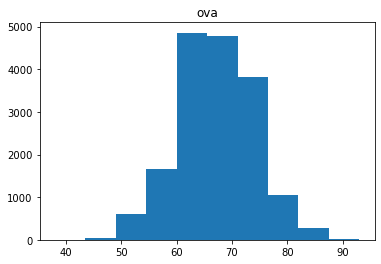

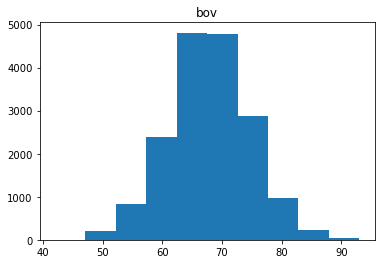

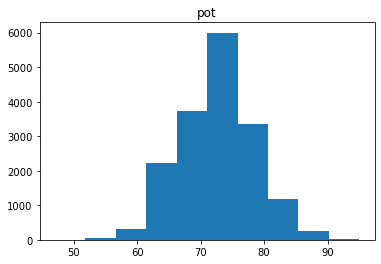

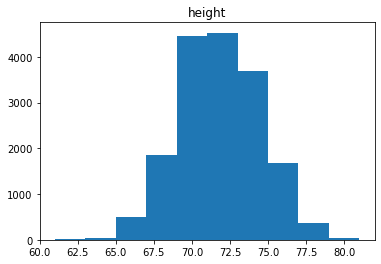

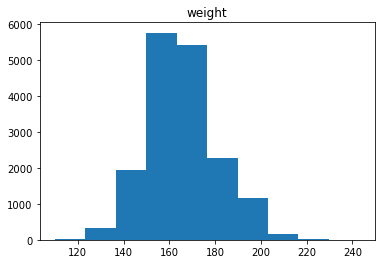

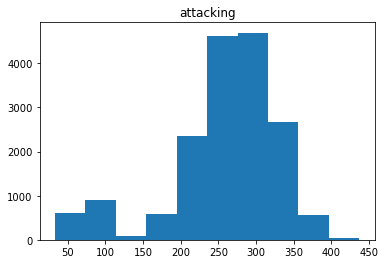

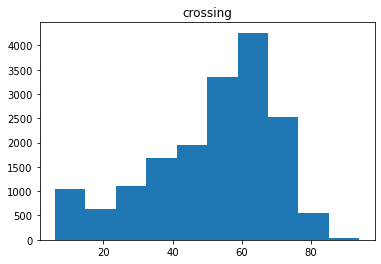

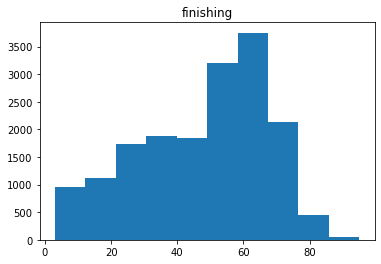

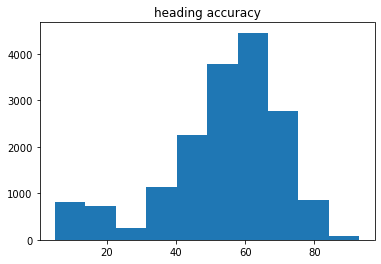

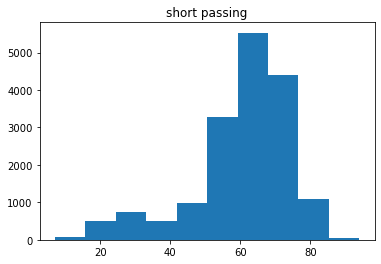

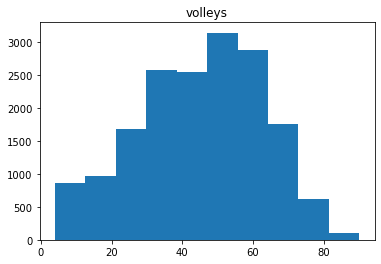

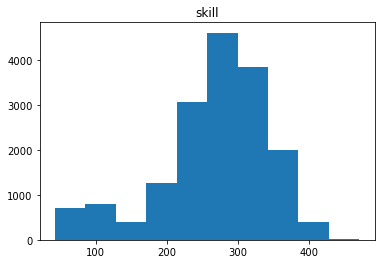

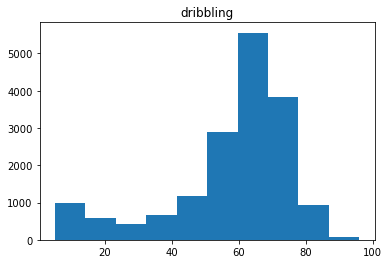

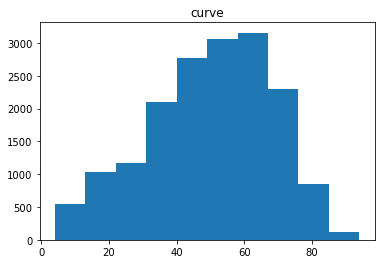

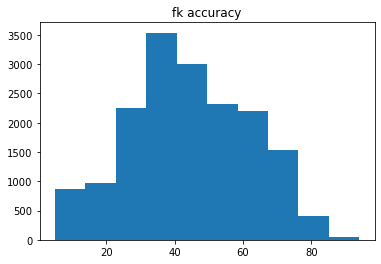

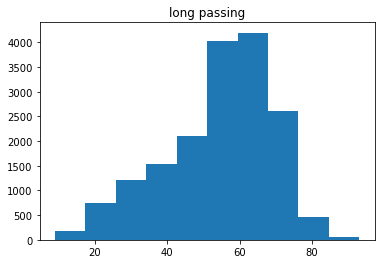

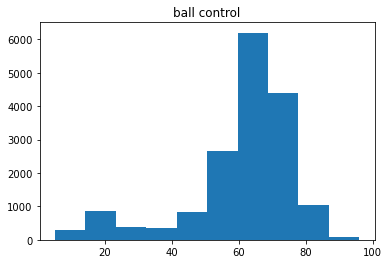

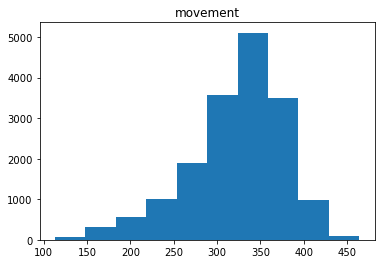

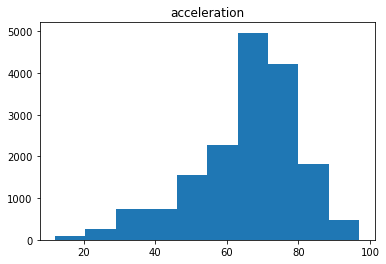

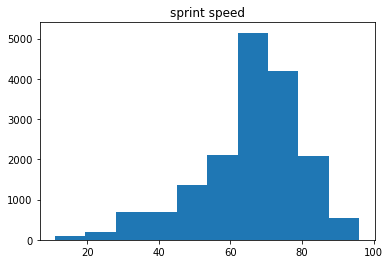

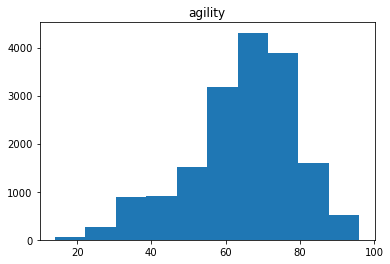

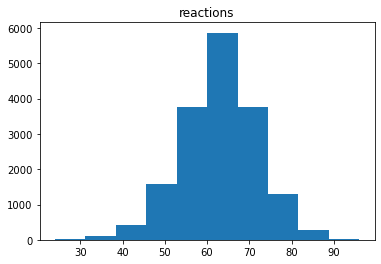

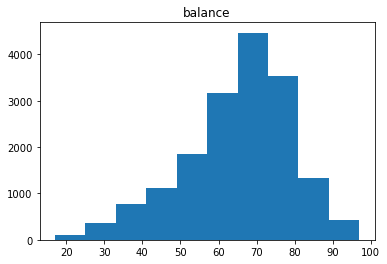

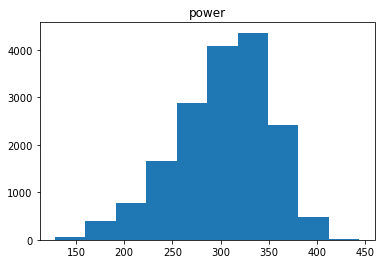

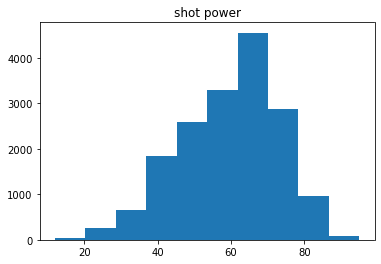

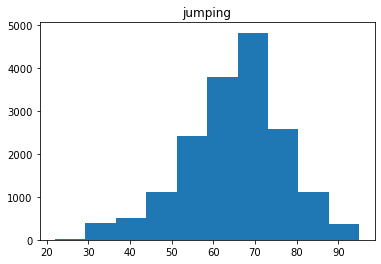

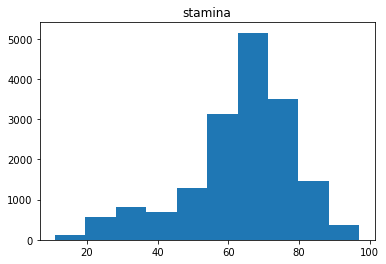

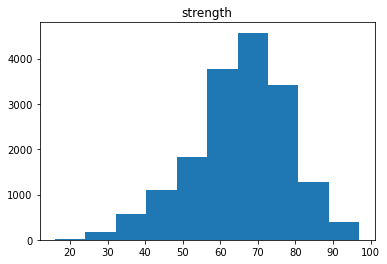

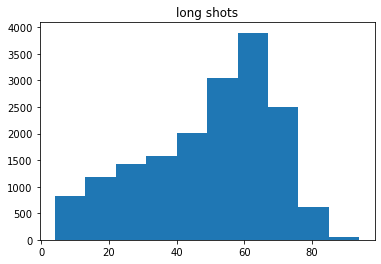

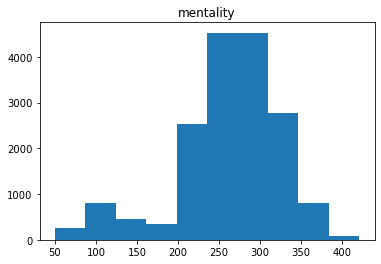

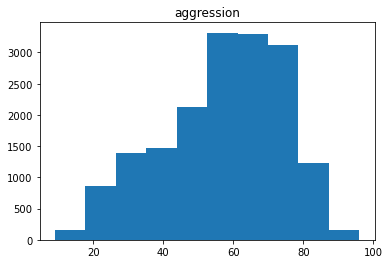

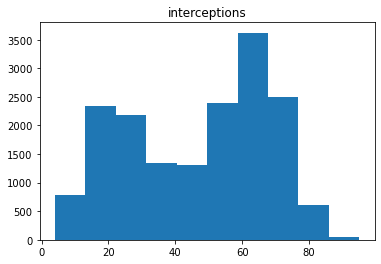

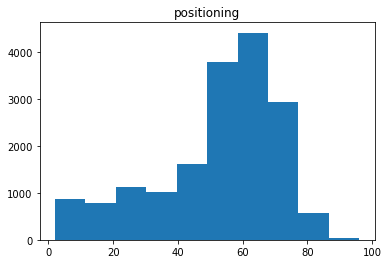

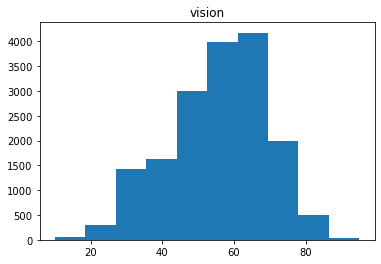

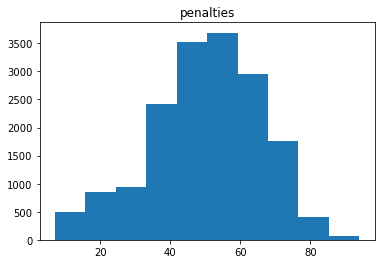

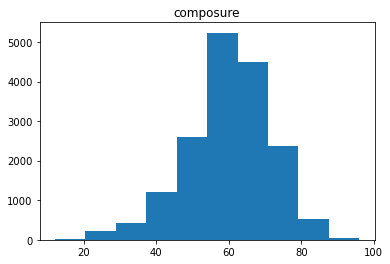

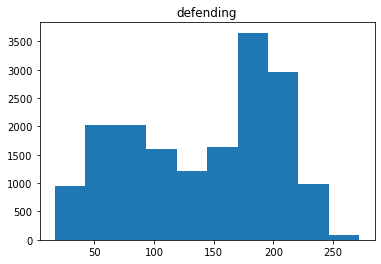

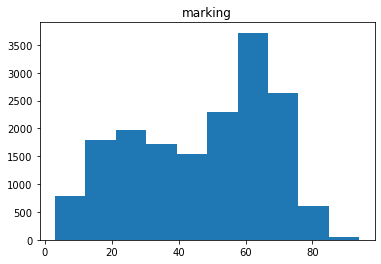

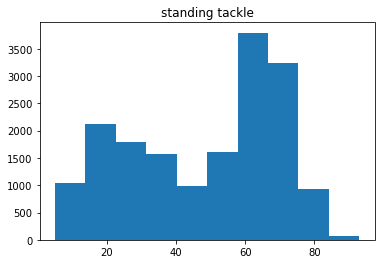

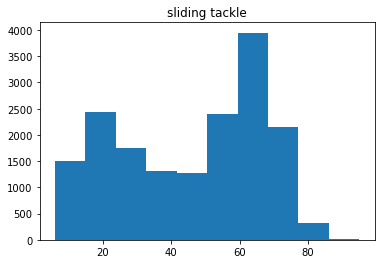

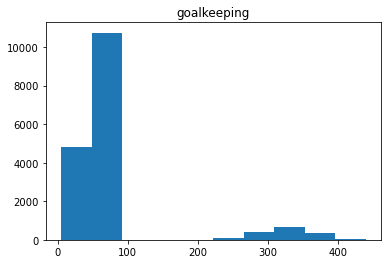

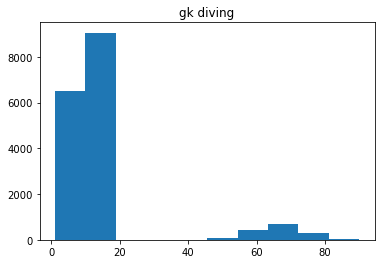

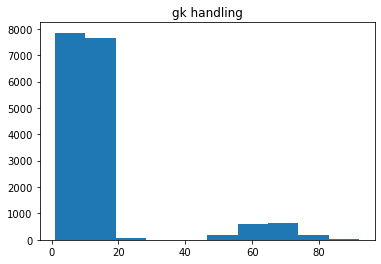

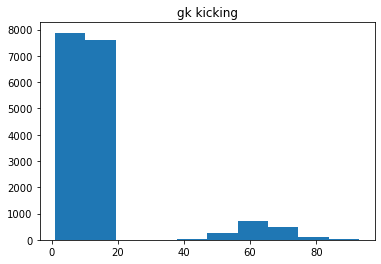

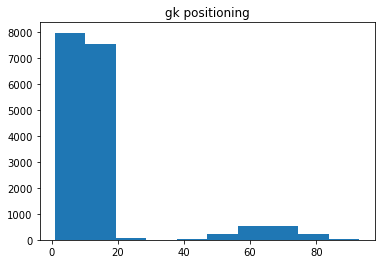

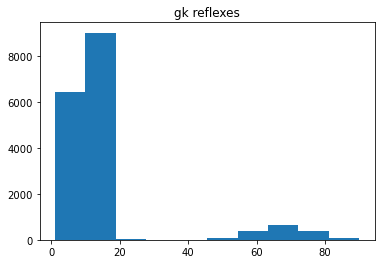

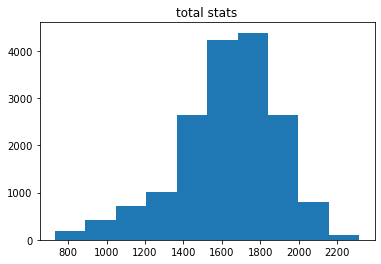

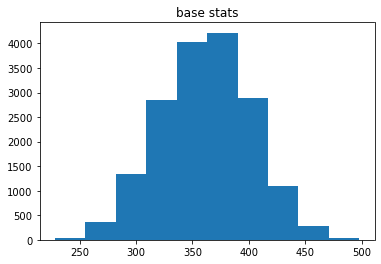

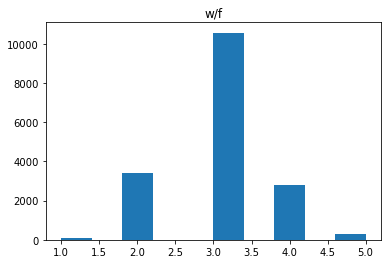

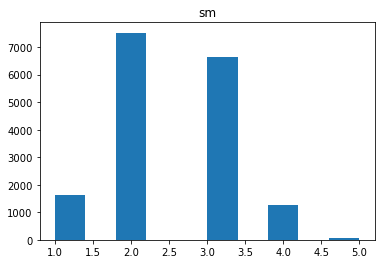

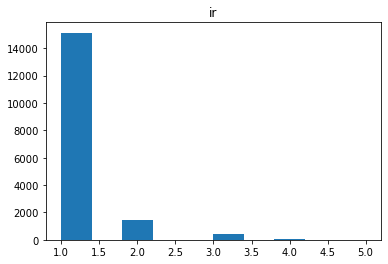

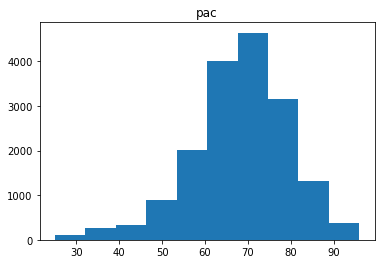

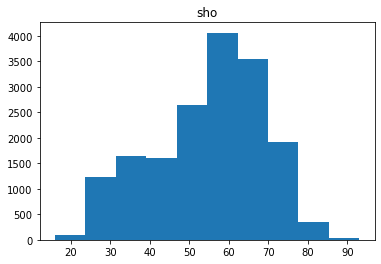

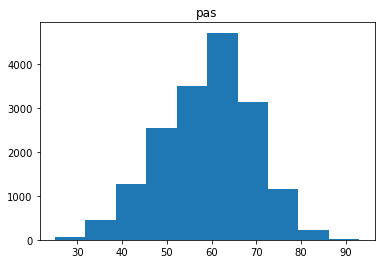

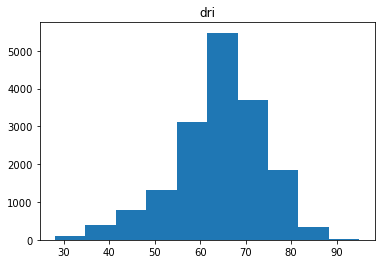

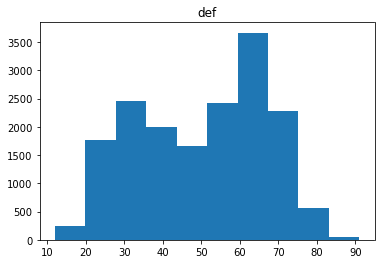

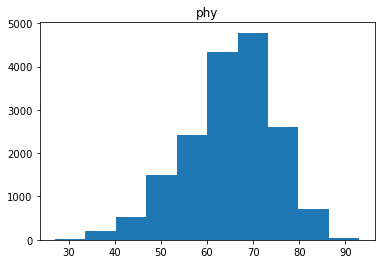

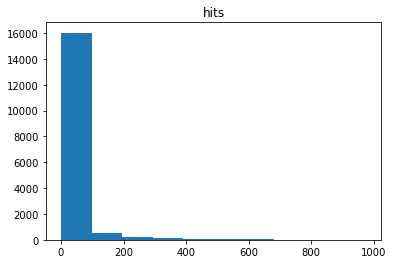

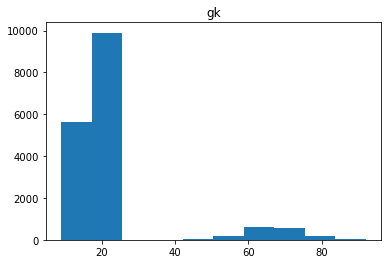

In [87]:
for i in numerical:
    plt.figure()
    plt.hist(fifa21[i])
    plt.title(i)

In [88]:
fifa21.shape

(17125, 62)

In [89]:
fifa21['bp'].value_counts()/len(fifa21)*100

CB     18.989781
ST     15.532847
CAM    13.115328
GK      9.202920
RM      8.198540
CDM     7.275912
CM      5.781022
LB      5.378102
RB      5.220438
LM      4.700730
RW      1.921168
LWB     1.471533
RWB     1.471533
LW      1.220438
CF      0.519708
Name: bp, dtype: float64

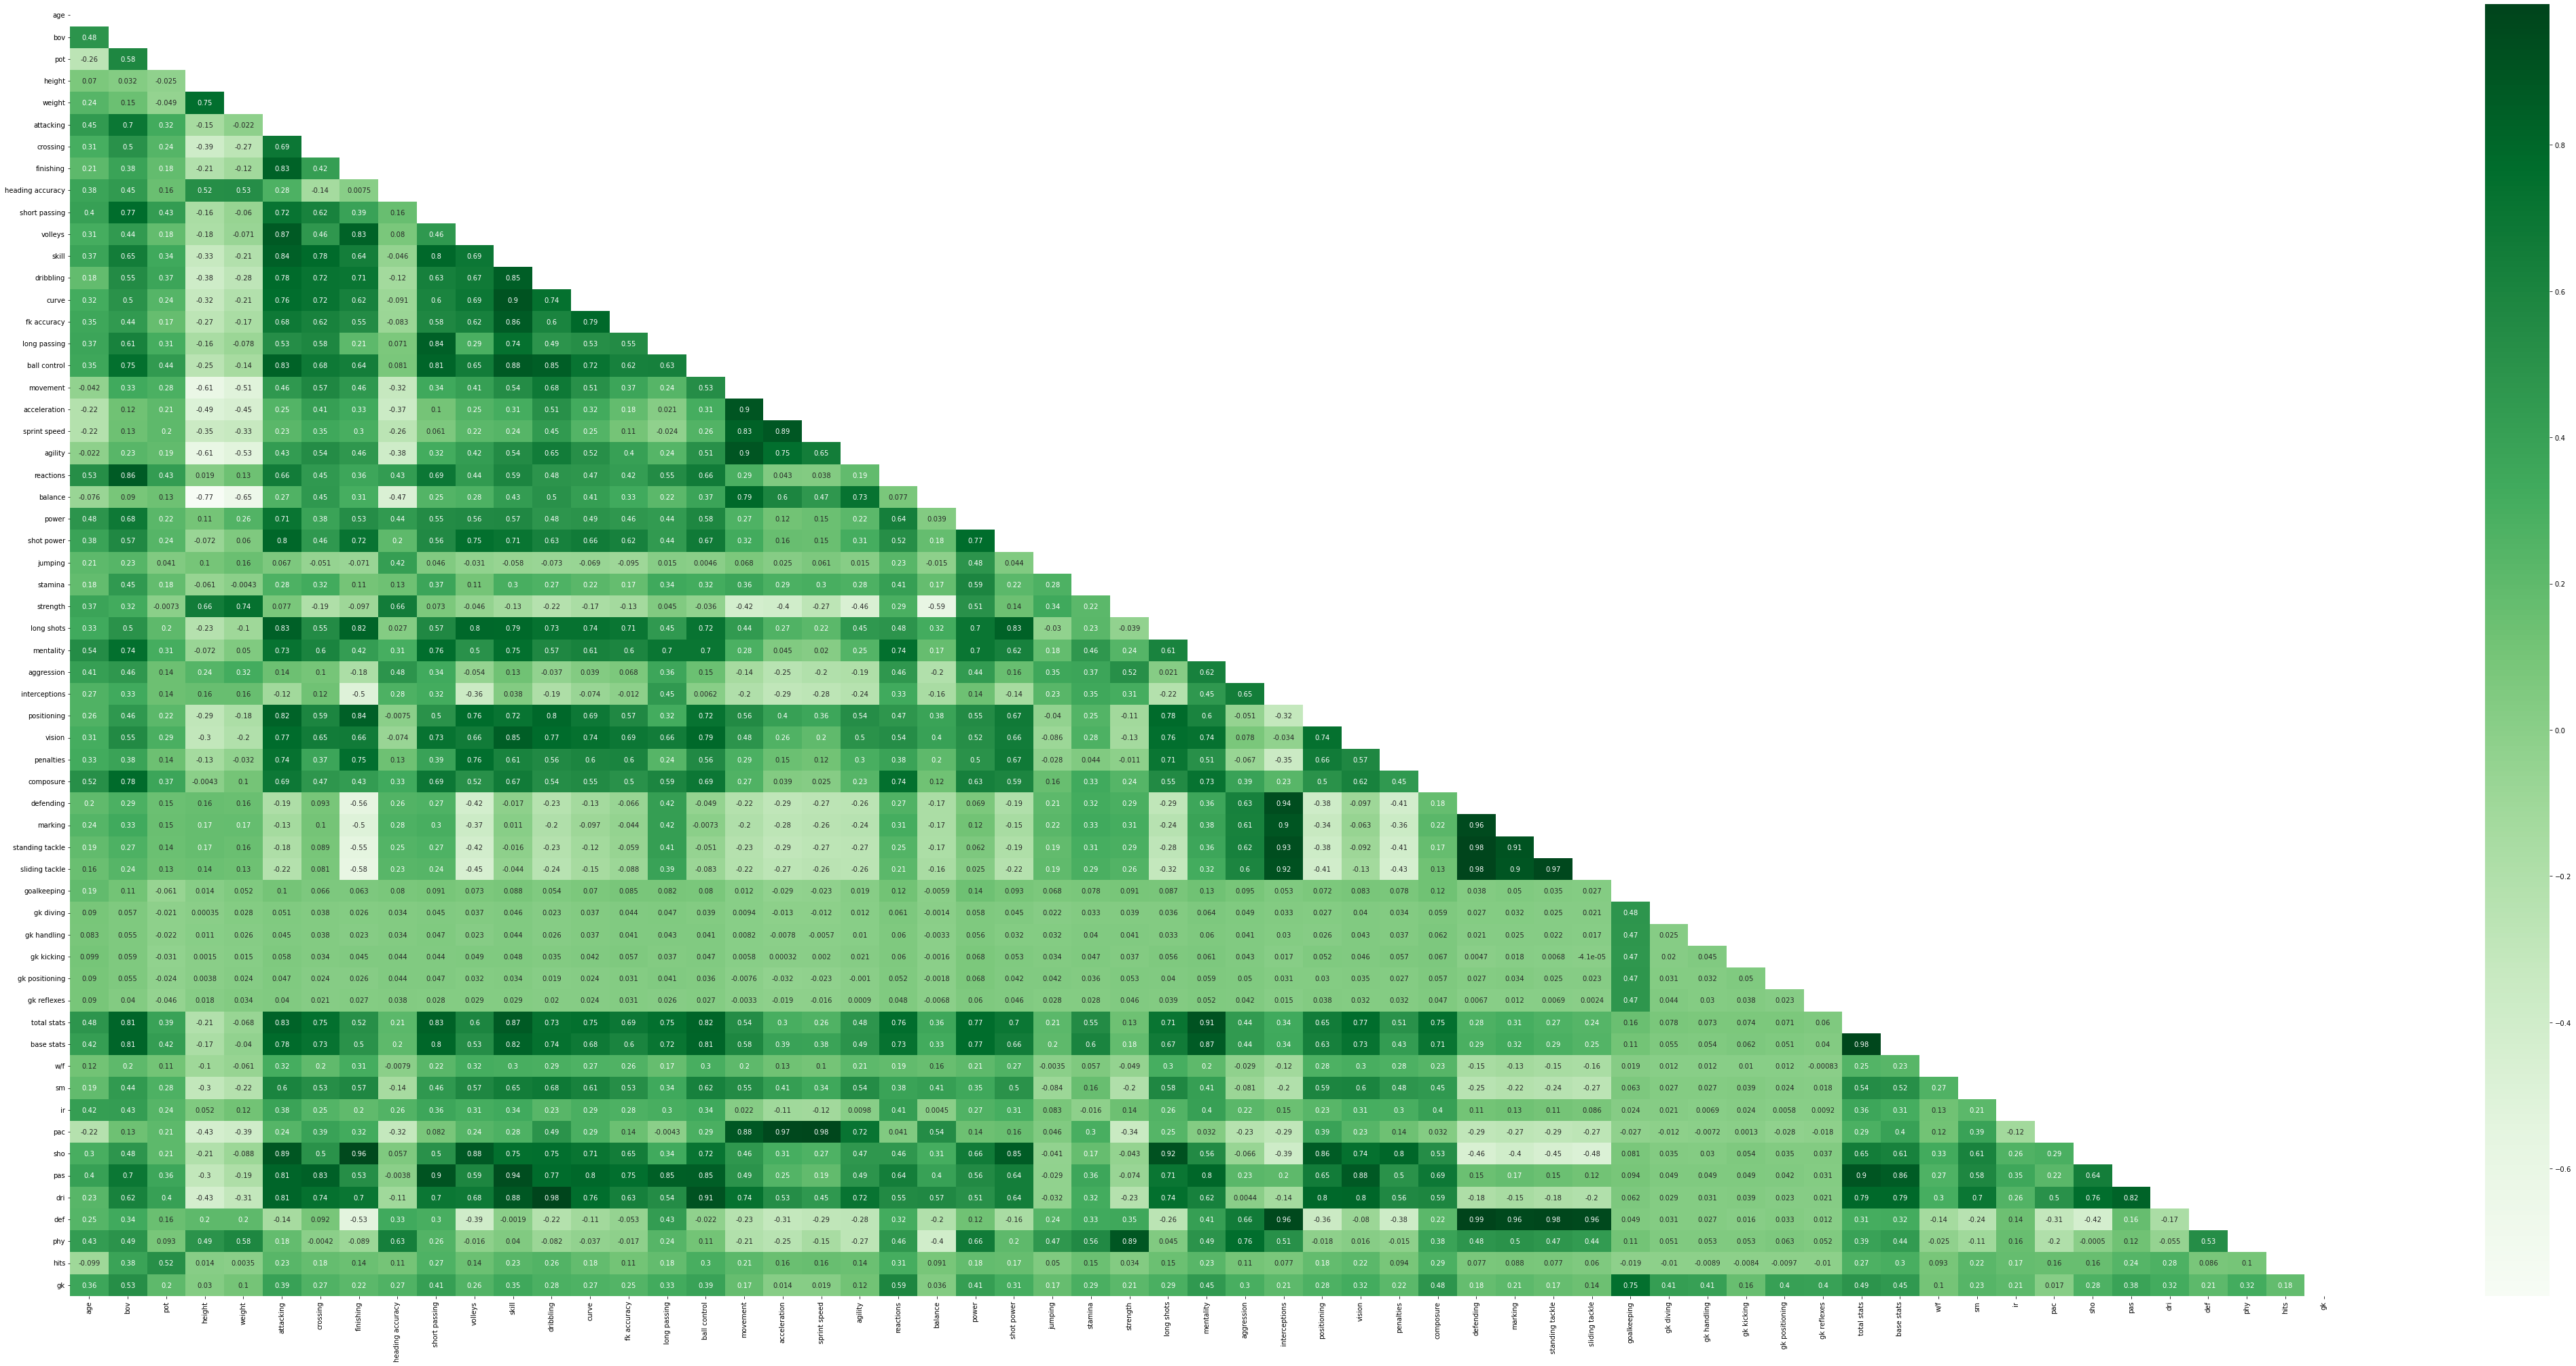

In [170]:
fig, ax = plt.subplots(figsize=(75, 35))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap= 'Greens')
plt.show()

In [91]:
# Transposing. finding out correlations to see if there are more columns to delete or if we need to remove outliers.

In [92]:
fifa21.T

0     1     2     3      4     5     6     7     8     9     10    11     \
age     33    37    33    36     36    27    38    39    35    37    35    37   
ova     69    71    71    68     81    66    77    78    76    80    74    78   
bov     71    70    71    70     82    66    77    78    78    82    75    77   
bp     LWB    CM   CAM    ST    CAM    RW    CM   CAM    CB   CAM    CB    CM   
pot     69    71    71    82     81    70    77    78    82    80    74    78   
...    ...   ...   ...   ...    ...   ...   ...   ...   ...   ...   ...   ...   
dri     71    69    77    69     85    67    77    77    53    79    62    71   
def     68    58    36    47     63    27    62    41    81    59    76    52   
phy     69    63    52    60     59    63    66    57    74    61    72    74   
hits   4.0   4.0  11.0   3.0  149.0   7.0   7.0   9.0   4.0   7.0   7.0  16.0   
gk      17    18    15    22     20    13    18    12    13    15    12    16   

     12    13    14    15    16    17    18    19    20    21    22    23     \
age     35    35    38    36    33    26    42    39    39    38    39    38   
ova     80    75    87    61    73    66    73    79    69    79    75    70   
bov     81    75    87    67    76    66    73    81    69    79    75    74   
bp      CF    CB    GK    CB    CF    ST    GK    GK    GK   CDM   CDM   CAM   
pot     80    79    90    82    90    72    73    87    69    79    75    70   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
dri     82    48    83    46    86    62    69    76    68    77    80    72   
def     31    76    60    69    38    38    25    52    33    77    68    34   
phy     69    81    92    67    48    76    78    88    71    76    67    38   
hits  10.0   3.0   4.0   3.0   3.0   3.0   3.0   3.0   3.0   9.0   5.0   8.0   
gk      21    12    87    14    23    16    73    81    69    15    13    14   

     24    25     26    27    28    29    30    31    32    33    34    35     \
age     37    40     42    35    37    37    37    35    39    37    34    35   
ova     73    77     82    82    82    73    75    61    80    82    76    83   
bov     72    78     82    82    82    72    75    64    82    81    77    83   
bp      CB    CB     GK    CB    CB    ST    GK    CF   CAM   CAM   CDM    CB   
pot     73    89     82    89    84    73    75    68    80    82    87    87   
...    ...   ...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
dri     58    67     78    63    63    57    77    61    81    83    68    72   
def     75    86     33    87    80    20    38    62    21    50    77    85   
phy     62    62     91    76    67    35    80    73    67    70    80    84   
hits   7.0  10.0  154.0   9.0   3.0   4.0   6.0   4.0  18.0   6.0   5.0   6.0   
gk      15    22     82    24    23    16    75    25    20    18    16    25   

     36    37    38    39    40    41    42    43    44    45    46    47     \
age     36    37    37    34    34    37    29    36    37    33    40    41   
ova     79    74    75    75    69    72    79    75    66    76    73    58   
bov     80    74    75    75    69    72    84    74    66    75    72    61   
bp     CAM   CDM    GK    ST    CM    GK   RWB    GK    ST    LB    GK    ST   
pot     79    81    83    83    69    72    82    75    66    76    73    58   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
dri     81    70    73    75    65    70    75    77    64    73    70    63   
def     28    74    39    41    60    33    85    22    48    74    42    43   
phy     61    74    78    57    73    73    75    81    71    78    76    72   
hits  22.0   4.0   4.0   7.0   3.0  34.0   3.0   5.0   3.0   4.0   7.0  19.0   
gk      16    12    75    23    16    72    17    75    19    23    73    17   

     48    49    50    51    52    53    54    55    56    57    58    59     \
age     36    32    36    34    37    37    38    34    3

In [93]:
fifa21.corr()

age       ova       bov       pot    height    weight  \
age               1.000000  0.517099  0.456734 -0.237619  0.092935  0.258682   
ova               0.517099  1.000000  0.985877  0.592268  0.027077  0.151834   
bov               0.456734  0.985877  1.000000  0.628323  0.015950  0.132560   
pot              -0.237619  0.592268  0.628323  1.000000 -0.021094 -0.039809   
height            0.092935  0.027077  0.015950 -0.021094  1.000000  0.766072   
weight            0.258682  0.151834  0.132560 -0.039809  0.766072  1.000000   
attacking         0.183954  0.431238  0.464329  0.233866 -0.354000 -0.258559   
crossing          0.151022  0.386334  0.400046  0.210944 -0.493419 -0.394283   
finishing         0.105311  0.304012  0.336488  0.173281 -0.359231 -0.270512   
heading accuracy  0.172793  0.305553  0.335677  0.137199  0.061263  0.090842   
short passing     0.176786  0.492372  0.533046  0.318544 -0.352632 -0.266584   
volleys           0.187012  0.360915  0.386384  0.176690 -0.332902 -0.235336   
skill             0.168876  0.441689  0.473888  0.265503 -0.455071 -0.355846   
dribbling         0.039607  0.350249  0.388163  0.264651 -0.484958 -0.402090   
curve             0.180267  0.397320  0.417342  0.220134 -0.439525 -0.340810   
fk accuracy       0.223884  0.369278  0.387289  0.166233 -0.399550 -0.296945   
long passing      0.223088  0.482655  0.515422  0.283647 -0.315305 -0.235302   
ball control      0.121097  0.431284  0.471454  0.292414 -0.411104 -0.324340   
movement         -0.055642  0.302267  0.335011  0.258243 -0.632736 -0.537899   
acceleration     -0.186610  0.143928  0.179547  0.197884 -0.550613 -0.496165   
sprint speed     -0.180717  0.153476  0.189491  0.197396 -0.454536 -0.410374   
agility          -0.041315  0.226127  0.254781  0.189332 -0.638189 -0.557531   
reactions         0.501010  0.870084  0.870157  0.471139 -0.000640  0.115521   
balance          -0.085504  0.100438  0.127728  0.131481 -0.779472 -0.662307   
power             0.310459  0.546417  0.572275  0.221586 -0.131472  0.001110   
shot power        0.304947  0.534829  0.550932  0.266902 -0.168294 -0.044814   
jumping           0.196550  0.258627  0.262992  0.075942  0.011255  0.079488   
stamina           0.069741  0.335108  0.368788  0.170122 -0.277906 -0.218123   
strength          0.350439  0.338347  0.335436  0.030991  0.556825  0.644488   
long shots        0.190803  0.390849  0.419660  0.191780 -0.373916 -0.264005   
mentality         0.272976  0.495097  0.523526  0.243646 -0.303501 -0.202414   
aggression        0.276063  0.382813  0.400031  0.139444 -0.018987  0.058685   
interceptions     0.192908  0.305137  0.319847  0.143761 -0.033869 -0.012936   
positioning       0.122510  0.339672  0.368071  0.191910 -0.426240 -0.331385   
vision            0.235359  0.505168  0.527542  0.304512 -0.368985 -0.272950   
penalties         0.198917  0.317666  0.340311  0.147044 -0.307516 -0.211269   
composure         0.408532  0.693825  0.709538  0.362535 -0.151670 -0.043803   
defending         0.114796  0.248247  0.267770  0.138748 -0.050707 -0.039581   
marking           0.155497  0.290071  0.309674  0.147320 -0.046823 -0.026690   
standing tackle   0.106178  0.237478  0.257583  0.138787 -0.047029 -0.038175   
sliding tackle    0.085663  0.208920  0.227278  0.128934 -0.054481 -0.049032   
goalkeeping       0.125933  0.038222 -0.008702 -0.007277  0.348395  0.326939   
gk diving         0.120891  0.037851 -0.008851 -0.005874  0.343340  0.322130   
gk handling       0.125251  0.037993 -0.008312 -0.005240  0.344747  0.323495   
gk kicking        0.130810  0.038650 -0.006124 -0.002734  0.335879  0.315963   
gk positioning    0.134369  0.044653 -0.000933 -0.004015  0.343553  0.325101   
gk reflexes       0.121822  0.037284 -0.008819 -0.005215  0.345783  0.323564   
total stats       0.280383  0.607676  0.635037  0.329178 -0.367699 -0.246410   
base stats        0.414897  0.832618  0.830127  0.474763 -0.121205  0.005923   
w/f               0.081

In [94]:
fifa21['age'].value_counts()/len(fifa21)*100

22    7.719708
23    7.632117
21    7.398540
20    7.328467
24    7.164964
25    6.475912
26    6.347445
28    6.032117
27    5.991241
19    5.909489
29    5.091971
30    4.490511
31    3.906569
18    3.865693
32    3.357664
33    2.948905
34    2.300730
17    1.681752
35    1.529927
36    1.016058
37    0.648175
38    0.426277
16    0.262774
39    0.227737
40    0.122628
42    0.052555
41    0.046715
43    0.011679
47    0.005839
53    0.005839
Name: age, dtype: float64

In [95]:
fifa21

age  ova  bov   bp  pot  height  weight   foot  attacking  crossing  \
0       33   69   71  LWB   69      72     181   Left        313        75   
1       37   71   70   CM   71      70     143  Right        337        68   
2       33   71   71  CAM   71      69     161  Right        337        80   
3       36   68   70   ST   82      71     165  Right        264        54   
4       36   81   82  CAM   81      67     150  Right        367        75   
...    ...  ...  ...  ...  ...     ...     ...    ...        ...       ...   
17120   22   64   66   CB   69      78     165  Right        197        35   
17121   18   56   58  CAM   66      70     170  Right        248        50   
17122   18   56   56   RB   67      69     154  Right        218        55   
17123   20   62   62   RB   73      69     148  Right        223        62   
17124   18   59   61   ST   74      70     154  Right        254        32   

       finishing  heading accuracy  short passing    volleys  skill  \
0             50                59             71  58.000000    338   
1             64                61             76  68.000000    369   
2             64                41             77  75.000000    387   
3             70                60             80  45.005742    255   
4             69                54             90  79.000000    408   
...          ...               ...            ...        ...    ...   
17120         23                66             47  26.000000    193   
17121         43                50             64  41.000000    264   
17122         34                53             42  34.000000    212   
17123         26                52             60  23.000000    258   
17124         64                59             45  54.000000    235   

       dribbling      curve  fk accuracy  long passing  ball control  \
0             73  65.000000           60            69            71   
1             69  79.000000           79            71            71   
2             79  84.000000           77            69            78   
3             68  49.574676           46            64            77   
4             85  80.000000           70            83            90   
...          ...        ...          ...           ...           ...   
17120         44  26.000000           33            34            56   
17121         57  42.000000           50            61            54   
17122         52  43.000000           34            36            47   
17123         55  43.000000           46            57            57   
17124         57  45.000000           48            30            55   

       movement  acceleration  sprint speed    agility  reactions    balance  \
0           347            68            74  68.000000         69  68.000000   
1           305            56            50  62.000000         65  72.000000   
2           295            48            42  71.000000         59  75.000000   
3           176            59            62  64.602273         55  64.715591   
4           346            61            56  79.000000         75  75.000000   
...         ...           ...           ...        ...        ...        ...   
17120       243            52            55  46.000000         48  42.000000   
17121       298            61            63  52.000000         54  68.000000   
17122       308            66            61  54.000000         59  68.000000   
17123       349            72            70  74.000000         56  77.000000   
17124       317            68            72  59.000000         53  65.000000   

       power  shot power    jumping  stamina  strength  long shots  mentality  \
0        347          74  68.000000       69        68          68        320   
1        324          75  54.000000       64        60          71        362   
2        284          72  58.000000       29        56          69        317   
3        239          63  65.170212       51        66          59 

In [96]:
fifa21

age  ova  bov   bp  pot  height  weight   foot  attacking  crossing  \
0       33   69   71  LWB   69      72     181   Left        313        75   
1       37   71   70   CM   71      70     143  Right        337        68   
2       33   71   71  CAM   71      69     161  Right        337        80   
3       36   68   70   ST   82      71     165  Right        264        54   
4       36   81   82  CAM   81      67     150  Right        367        75   
...    ...  ...  ...  ...  ...     ...     ...    ...        ...       ...   
17120   22   64   66   CB   69      78     165  Right        197        35   
17121   18   56   58  CAM   66      70     170  Right        248        50   
17122   18   56   56   RB   67      69     154  Right        218        55   
17123   20   62   62   RB   73      69     148  Right        223        62   
17124   18   59   61   ST   74      70     154  Right        254        32   

       finishing  heading accuracy  short passing    volleys  skill  \
0             50                59             71  58.000000    338   
1             64                61             76  68.000000    369   
2             64                41             77  75.000000    387   
3             70                60             80  45.005742    255   
4             69                54             90  79.000000    408   
...          ...               ...            ...        ...    ...   
17120         23                66             47  26.000000    193   
17121         43                50             64  41.000000    264   
17122         34                53             42  34.000000    212   
17123         26                52             60  23.000000    258   
17124         64                59             45  54.000000    235   

       dribbling      curve  fk accuracy  long passing  ball control  \
0             73  65.000000           60            69            71   
1             69  79.000000           79            71            71   
2             79  84.000000           77            69            78   
3             68  49.574676           46            64            77   
4             85  80.000000           70            83            90   
...          ...        ...          ...           ...           ...   
17120         44  26.000000           33            34            56   
17121         57  42.000000           50            61            54   
17122         52  43.000000           34            36            47   
17123         55  43.000000           46            57            57   
17124         57  45.000000           48            30            55   

       movement  acceleration  sprint speed    agility  reactions    balance  \
0           347            68            74  68.000000         69  68.000000   
1           305            56            50  62.000000         65  72.000000   
2           295            48            42  71.000000         59  75.000000   
3           176            59            62  64.602273         55  64.715591   
4           346            61            56  79.000000         75  75.000000   
...         ...           ...           ...        ...        ...        ...   
17120       243            52            55  46.000000         48  42.000000   
17121       298            61            63  52.000000         54  68.000000   
17122       308            66            61  54.000000         59  68.000000   
17123       349            72            70  74.000000         56  77.000000   
17124       317            68            72  59.000000         53  65.000000   

       power  shot power    jumping  stamina  strength  long shots  mentality  \
0        347          74  68.000000       69        68          68        320   
1        324          75  54.000000       64        60          71        362   
2        284          72  58.000000       29        56          69        317   
3        239          63  65.170212       51        66          59 

In [97]:
fifa21['goalkeeping']

0        56
1        56
2        51
3        68
4        45
         ..
17120    39
17121    57
17122    40
17123    51
17124    48
Name: goalkeeping, Length: 17125, dtype: int64

In [98]:
IQR = np.percentile(fifa21['goalkeeping'], 75) - np.percentile(fifa21['goalkeeping'], 25)
upper_limit = np.percentile(fifa21['goalkeeping'],75)+1.5*IQR
lower_limit = np.percentile(fifa21['goalkeeping'],25)-1.5*IQR

In [99]:
fifa21 = fifa21[(fifa21['goalkeeping']>lower_limit) & (fifa21['goalkeeping']<upper_limit)]

In [100]:
IQR = np.percentile(fifa21['gk diving'], 75) - np.percentile(fifa21['gk diving'], 25)
upper_limit = np.percentile(fifa21['gk diving'],75)+1.5*IQR
lower_limit = np.percentile(fifa21['gk diving'],25)-1.5*IQR

fifa21 = fifa21[(fifa21['gk diving']>lower_limit) & (fifa21['gk diving']<upper_limit)]

In [101]:
IQR = np.percentile(fifa21['gk handling'], 75) - np.percentile(fifa21['gk diving'], 25)
upper_limit = np.percentile(fifa21['gk handling'],75)+1.5*IQR
lower_limit = np.percentile(fifa21['gk handling'],25)-1.5*IQR

fifa21 = fifa21[(fifa21['gk handling']>lower_limit) & (fifa21['gk diving']<upper_limit)]

In [102]:
IQR = np.percentile(fifa21['gk kicking'], 75) - np.percentile(fifa21['gk diving'], 25)
upper_limit = np.percentile(fifa21['gk kicking'],75)+1.5*IQR
lower_limit = np.percentile(fifa21['gk kicking'],25)-1.5*IQR

fifa21 = fifa21[(fifa21['gk kicking']>lower_limit) & (fifa21['gk diving']<upper_limit)]

In [103]:
IQR = np.percentile(fifa21['gk positioning'], 75) - np.percentile(fifa21['gk diving'], 25)
upper_limit = np.percentile(fifa21['gk positioning'],75)+1.5*IQR
lower_limit = np.percentile(fifa21['gk positioning'],25)-1.5*IQR

fifa21 = fifa21[(fifa21['gk positioning']>lower_limit) & (fifa21['gk positioning']<upper_limit)]

In [104]:
IQR = np.percentile(fifa21['gk reflexes'], 75) - np.percentile(fifa21['gk diving'], 25)
upper_limit = np.percentile(fifa21['gk reflexes'],75)+1.5*IQR
lower_limit = np.percentile(fifa21['gk reflexes'],25)-1.5*IQR

fifa21 = fifa21[(fifa21['gk reflexes']>lower_limit) & (fifa21['gk reflexes']<upper_limit)]

In [105]:
IQR = np.percentile(fifa21['pot'], 75) - np.percentile(fifa21['pot'], 25)
upper_limit = np.percentile(fifa21['pot'],75)+1.5*IQR
lower_limit = np.percentile(fifa21['pot'],25)-1.5*IQR

In [106]:
fifa21 = fifa21[(fifa21['pot']>lower_limit) & (fifa21['pot']<upper_limit)]

<AxesSubplot:xlabel='pot'>

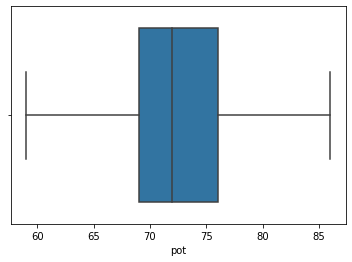

In [137]:
sns.boxplot(fifa21['pot'])

In [138]:
# reseting the index
fifa21.reset_index(drop = True, inplace = True)

In [139]:
fifa21.shape

(15145, 61)

In [140]:
fifa21

age  bov   bp  pot  height  weight   foot  attacking  crossing  \
0       33   71  LWB   69      72     181   Left        313        75   
1       37   70   CM   71      70     143  Right        337        68   
2       33   71  CAM   71      69     161  Right        337        80   
3       36   82  CAM   81      67     150  Right        367        75   
4       27   66   RW   70      68     163  Right        271        61   
...    ...  ...  ...  ...     ...     ...    ...        ...       ...   
15140   22   66   CB   69      78     165  Right        197        35   
15141   18   58  CAM   66      70     170  Right        248        50   
15142   18   56   RB   67      69     154  Right        218        55   
15143   20   62   RB   73      69     148  Right        223        62   
15144   18   61   ST   74      70     154  Right        254        32   

       finishing  heading accuracy  short passing  volleys  skill  dribbling  \
0             50                59             71     58.0    338         73   
1             64                61             76     68.0    369         69   
2             64                41             77     75.0    387         79   
3             69                54             90     79.0    408         85   
4             53                42             58     57.0    276         67   
...          ...               ...            ...      ...    ...        ...   
15140         23                66             47     26.0    193         44   
15141         43                50             64     41.0    264         57   
15142         34                53             42     34.0    212         52   
15143         26                52             60     23.0    258         55   
15144         64                59             45     54.0    235         57   

       curve  fk accuracy  long passing  ball control  movement  acceleration  \
0       65.0           60            69            71       347            68   
1       79.0           79            71            71       305            56   
2       84.0           77            69            78       295            48   
3       80.0           70            83            90       346            61   
4       61.0           42            44            62       406            90   
...      ...          ...           ...           ...       ...           ...   
15140   26.0           33            34            56       243            52   
15141   42.0           50            61            54       298            61   
15142   43.0           34            36            47       308            66   
15143   43.0           46            57            57       349            72   
15144   45.0           48            30            55       317            68   

       sprint speed  agility  reactions  balance  power  shot power  jumping  \
0                74     68.0         69     68.0    347          74     68.0   
1                50     62.0         65     72.0    324          75     54.0   
2                42     71.0         59     75.0    284          72     58.0   
3                56     79.0         75     75.0    297          67     40.0   
4                91     75.0         65     85.0    315          71     70.0   
...             ...      ...        ...      ...    ...         ...      ...   
15140            55     46.0         48     42.0    279          48     70.0   
15141            63     52.0         54     68.0    271          51     62.0   
15142            61     54.0         59     68.0    233          28     61.0   
15143            70     74.0         56     77.0    261          51     72.0   
15144            72     59.0         53     65.0    288          58     62.0   

       stamina  strength  long shots  mentality  aggression  interceptions  \
0           69        68          68        320          72           69.0   
1           64        60          71        362          71           71.0   
2

In [141]:
y = fifa21['ova']
x = fifa21 = fifa21.drop(['ova'], axis = 1)

KeyError: 'ova'

In [142]:
fifa21.shape

(15145, 61)

In [143]:
x_num = fifa21.select_dtypes(include = np.number)
x_cat = fifa21.select_dtypes(include = np.object)

In [144]:
x_cat.head()

bp   foot
0  LWB   Left
1   CM  Right
2  CAM  Right
3  CAM  Right
4   RW  Right

In [145]:
encoded = OneHotEncoder().fit_transform(x_cat).toarray()
encoded = pd.DataFrame(encoded)

In [146]:
encoded.shape

(15145, 16)

In [147]:
normalized = Normalizer().fit_transform(x_num)
normalized = pd.DataFrame(normalized)

In [148]:
encoded

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
15140  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
15141  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
15142  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
15143  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
15144  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   

        14   15  
0      1.0  0.0  
1      0.0  1.0  
2      0.0  1.0  
3      0.0  1.0  
4      0.0  1.0  
...    ...  ...  
15140  0.0  1.0  
15141  0.0  1.0  
15142  0.0  1.0  
15143  0.0  1.0  
15144  0.0  1.0  

[15145 rows x 16 columns]

In [149]:
normalized

0         1         2         3         4         5         6   \
0      0.015227  0.032760  0.031837  0.033222  0.083516  0.144422  0.034606   
1      0.017289  0.032708  0.033175  0.032708  0.066818  0.157467  0.031774   
2      0.016532  0.035570  0.035570  0.034568  0.080658  0.168830  0.040078   
3      0.015850  0.036102  0.035662  0.029498  0.066041  0.161580  0.033021   
4      0.014420  0.035248  0.037384  0.036316  0.087052  0.144730  0.032578   
...         ...       ...       ...       ...       ...       ...       ...   
15140  0.014222  0.042665  0.044604  0.050422  0.106663  0.127349  0.022625   
15141  0.010459  0.033700  0.038348  0.040672  0.098776  0.144097  0.029052   
15142  0.011166  0.034739  0.041563  0.042803  0.095532  0.135234  0.034119   
15143  0.011250  0.034874  0.041062  0.038812  0.083248  0.125435  0.034874   
15144  0.011294  0.038276  0.046433  0.043923  0.096630  0.159377  0.020079   

             7         8         9         10        11        12        13  \
0      0.023071  0.027223  0.032760  0.026762  0.155958  0.033683  0.029992   
1      0.029905  0.028503  0.035512  0.031774  0.172419  0.032241  0.036914   
2      0.032063  0.020540  0.038575  0.037574  0.193879  0.039577  0.042082   
3      0.030379  0.023775  0.039625  0.034782  0.179632  0.037423  0.035222   
4      0.028305  0.022431  0.030976  0.030441  0.147401  0.035782  0.032578   
...         ...       ...       ...       ...       ...       ...       ...   
15140  0.014868  0.042665  0.030383  0.016807  0.124763  0.028443  0.016807   
15141  0.024985  0.029052  0.037186  0.023822  0.153393  0.033119  0.024403   
15142  0.021092  0.032878  0.026054  0.021092  0.131512  0.032258  0.026675   
15143  0.014625  0.029249  0.033749  0.012937  0.145122  0.030937  0.024187   
15144  0.040158  0.037021  0.028236  0.033883  0.147455  0.035766  0.028236   

             14        15        16        17        18        19        20  \
0      0.027685  0.031837  0.032760  0.160110  0.031376  0.034145  0.031376   
1      0.036914  0.033175  0.033175  0.142514  0.026167  0.023363  0.028970   
2      0.038575  0.034568  0.039076  0.147789  0.024047  0.021041  0.035570   
3      0.030819  0.036543  0.039625  0.152335  0.026857  0.024655  0.034782   
4      0.022431  0.023499  0.033112  0.216829  0.048065  0.048600  0.040055   
...         ...       ...       ...       ...       ...       ...       ...   
15140  0.021333  0.021979  0.036201  0.157085  0.033615  0.035554  0.029736   
15141  0.029052  0.035443  0.031376  0.173148  0.035443  0.036605  0.030214   
15142  0.021092  0.022332  0.029156  0.191065  0.040942  0.037841  0.033498   
15143  0.025875  0.032062  0.032062  0.196309  0.040499  0.039374  0.041624   
15144  0.030119  0.018824  0.034511  0.198908  0.042668  0.045178  0.037021   

             21        22        23        24        25        26        27  \
0      0.031837  0.031376  0.160110  0.034145  0.031376  0.031837  0.031376   
1      0.030372  0.033643  0.151392  0.035045  0.025232  0.029905  0.028036   
2      0.029558  0.037574  0.142278  0.036071  0.029057  0.014528  0.028055   
3      0.033021  0.033021  0.130761  0.029498  0.017611  0.025536  0.027297   
4      0.034714  0.045395  0.168229  0.037918  0.037384  0.034180  0.032578   
...         ...       ...       ...       ...       ...       ...       ...   
15140  0.031029  0.027151  0.180357  0.031029  0.045251  0.038140  0.047837   
15141  0.031376  0.039510  0.157460  0.029633  0.036024  0.030795  0.033119   
15142  0.036600  0.042183  0.144539  0.017370  0.037841  0.032878  0.033498   
15143  0.031499  0.043312  0.146810  0.028687  0.040499  0.032062  0.027000   
15144  0.033256  0.040786  0.180711  0.036393  0.038903  0.034511  0.032628   

             28        29        30        31        32        33        34  \
0      0.031376  0.147652  0.033222  0.031837  0.029069  0.030453  0.023071   
1      0.033175  0.169148  0.033175  0.033175  0.033643  0.

In [150]:
x_features = np.concatenate((normalized, encoded), axis = 1)
x_features = pd.DataFrame(x_features)

x_features

0         1         2         3         4         5         6   \
0      0.015227  0.032760  0.031837  0.033222  0.083516  0.144422  0.034606   
1      0.017289  0.032708  0.033175  0.032708  0.066818  0.157467  0.031774   
2      0.016532  0.035570  0.035570  0.034568  0.080658  0.168830  0.040078   
3      0.015850  0.036102  0.035662  0.029498  0.066041  0.161580  0.033021   
4      0.014420  0.035248  0.037384  0.036316  0.087052  0.144730  0.032578   
...         ...       ...       ...       ...       ...       ...       ...   
15140  0.014222  0.042665  0.044604  0.050422  0.106663  0.127349  0.022625   
15141  0.010459  0.033700  0.038348  0.040672  0.098776  0.144097  0.029052   
15142  0.011166  0.034739  0.041563  0.042803  0.095532  0.135234  0.034119   
15143  0.011250  0.034874  0.041062  0.038812  0.083248  0.125435  0.034874   
15144  0.011294  0.038276  0.046433  0.043923  0.096630  0.159377  0.020079   

             7         8         9         10        11        12        13  \
0      0.023071  0.027223  0.032760  0.026762  0.155958  0.033683  0.029992   
1      0.029905  0.028503  0.035512  0.031774  0.172419  0.032241  0.036914   
2      0.032063  0.020540  0.038575  0.037574  0.193879  0.039577  0.042082   
3      0.030379  0.023775  0.039625  0.034782  0.179632  0.037423  0.035222   
4      0.028305  0.022431  0.030976  0.030441  0.147401  0.035782  0.032578   
...         ...       ...       ...       ...       ...       ...       ...   
15140  0.014868  0.042665  0.030383  0.016807  0.124763  0.028443  0.016807   
15141  0.024985  0.029052  0.037186  0.023822  0.153393  0.033119  0.024403   
15142  0.021092  0.032878  0.026054  0.021092  0.131512  0.032258  0.026675   
15143  0.014625  0.029249  0.033749  0.012937  0.145122  0.030937  0.024187   
15144  0.040158  0.037021  0.028236  0.033883  0.147455  0.035766  0.028236   

             14        15        16        17        18        19        20  \
0      0.027685  0.031837  0.032760  0.160110  0.031376  0.034145  0.031376   
1      0.036914  0.033175  0.033175  0.142514  0.026167  0.023363  0.028970   
2      0.038575  0.034568  0.039076  0.147789  0.024047  0.021041  0.035570   
3      0.030819  0.036543  0.039625  0.152335  0.026857  0.024655  0.034782   
4      0.022431  0.023499  0.033112  0.216829  0.048065  0.048600  0.040055   
...         ...       ...       ...       ...       ...       ...       ...   
15140  0.021333  0.021979  0.036201  0.157085  0.033615  0.035554  0.029736   
15141  0.029052  0.035443  0.031376  0.173148  0.035443  0.036605  0.030214   
15142  0.021092  0.022332  0.029156  0.191065  0.040942  0.037841  0.033498   
15143  0.025875  0.032062  0.032062  0.196309  0.040499  0.039374  0.041624   
15144  0.030119  0.018824  0.034511  0.198908  0.042668  0.045178  0.037021   

             21        22        23        24        25        26        27  \
0      0.031837  0.031376  0.160110  0.034145  0.031376  0.031837  0.031376   
1      0.030372  0.033643  0.151392  0.035045  0.025232  0.029905  0.028036   
2      0.029558  0.037574  0.142278  0.036071  0.029057  0.014528  0.028055   
3      0.033021  0.033021  0.130761  0.029498  0.017611  0.025536  0.027297   
4      0.034714  0.045395  0.168229  0.037918  0.037384  0.034180  0.032578   
...         ...       ...       ...       ...       ...       ...       ...   
15140  0.031029  0.027151  0.180357  0.031029  0.045251  0.038140  0.047837   
15141  0.031376  0.039510  0.157460  0.029633  0.036024  0.030795  0.033119   
15142  0.036600  0.042183  0.144539  0.017370  0.037841  0.032878  0.033498   
15143  0.031499  0.043312  0.146810  0.028687  0.040499  0.032062  0.027000   
15144  0.033256  0.040786  0.180711  0.036393  0.038903  0.034511  0.032628   

             28        29        30        31        32        33        34  \
0      0.031376  0.147652  0.033222  0.031837  0.029069  0.030453  0.023071   
1      0.033175  0.169148  0.033175  0.033175  0.033643  0.

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y, test_size = 0.25, random_state = 1000)

In [152]:
x_train.shape

(11358, 75)

In [153]:
x_test.shape

(3787, 75)

In [154]:
y_test.shape

(3787,)

In [155]:
y_train.shape

(11358,)

In [156]:
model = LinearRegression()

In [157]:
model.fit(x_train, y_train)

LinearRegression()

In [158]:
predictions = model.predict(x_test)

In [159]:
x_test.head()

0         1         2         3         4         5         6   \
6018   0.009935  0.036758  0.037254  0.032784  0.065568  0.155972  0.036758   
10971  0.014546  0.035416  0.041108  0.043005  0.107513  0.149254  0.032886   
7712   0.010191  0.032789  0.032789  0.031016  0.070452  0.143119  0.031903   
6554   0.011437  0.033270  0.037429  0.035869  0.075897  0.142437  0.034830   
10743  0.014371  0.038323  0.038855  0.038855  0.090485  0.133598  0.023420   

             7         8         9         10        11        12        13  \
6018   0.028313  0.017385  0.037254  0.036261  0.193723  0.038745  0.040732   
10971  0.034151  0.022767  0.030357  0.029092  0.170756  0.043638  0.030989   
7712   0.023484  0.030573  0.033675  0.023484  0.149322  0.031460  0.028358   
6554   0.022873  0.029111  0.032230  0.023393  0.144517  0.031710  0.027032   
10743  0.015436  0.035662  0.036726  0.022355  0.138389  0.031936  0.022887   

             14        15        16        17        18        19        20  \
6018   0.036758  0.036261  0.041228  0.183789  0.037254  0.035764  0.039738   
10971  0.030989  0.026562  0.038578  0.190362  0.039843  0.042373  0.039843   
7712   0.025256  0.033675  0.030573  0.172363  0.031903  0.032789  0.035890   
6554   0.019234  0.032750  0.033790  0.179866  0.033270  0.034310  0.041068   
10743  0.015436  0.033533  0.034597  0.182034  0.038323  0.040984  0.034065   

             21        22        23        24        25        26        27  \
6018   0.033281  0.037751  0.138090  0.033777  0.022353  0.031790  0.016392   
10971  0.023400  0.044903  0.153681  0.040476  0.027827  0.021503  0.035416   
7712   0.035004  0.036777  0.153310  0.025699  0.032789  0.036334  0.031460   
6554   0.026512  0.044707  0.158552  0.028072  0.036389  0.037429  0.029111   
10743  0.036726  0.031936  0.163405  0.028210  0.038855  0.036194  0.039920   

             28        29        30        31        32        33        34  \
6018   0.033777  0.135606  0.021856  0.009935  0.029307  0.042222  0.032287   
10971  0.028459  0.135340  0.022135  0.016443  0.030989  0.032254  0.033519   
7712   0.027029  0.157298  0.033232  0.031016  0.027915  0.033675  0.031460   
6554   0.027552  0.140358  0.031191  0.029631  0.023913  0.032750  0.022873   
10743  0.020226  0.133066  0.034597  0.037259  0.018097  0.023420  0.019694   

             35        36        37        38        39        40        41  \
6018   0.037751  0.051163  0.016889  0.018379  0.015895  0.027817  0.007451   
10971  0.032254  0.046800  0.015811  0.017076  0.013913  0.035416  0.008854   
7712   0.029687  0.091720  0.032346  0.030573  0.028801  0.023484  0.003988   
6554   0.025472  0.093052  0.028591  0.033790  0.030671  0.031710  0.006758   
10743  0.036726  0.110179  0.037791  0.037259  0.035129  0.025016  0.004790   

             42        43        44        45        46        47        48  \
6018   0.005961  0.004471  0.003477  0.006457  0.886160  0.182795  0.001987   
10971  0.006957  0.009486  0.004427  0.005692  0.881608  0.193524  0.001897   
7712   0.005317  0.005317  0.003545  0.005317  0.890615  0.186542  0.001772   
6554   0.005718  0.004159  0.007798  0.007278  0.890493  0.187664  0.001560   
10743  0.005323  0.003194  0.007452  0.004258  0.885688  0.196938  0.001597   

             49        50        51        52        53        54        55  \
6018   0.001987  0.000497  0.036261  0.031294  0.038248  0.039241  0.015895   
10971  0.001897  0.000632  0.041108  0.034151  0.030989  0.041108  0.017076   
7712   0.000886  0.000443  0.032346  0.025256  0.032789  0.031903  0.031016   
6554   0.001040  0.000520  0.033790  0.024953  0.032230  0.033790  0.030671   
10743  0.001065  0.000532  0.039920  0.019694  0.029275  0.033000  0.037259   

             56        57        58   59   60   61   62   63   64   65   66  \
6018   0.021856  0.015399  0.009438  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10971  0.029092  0.001897  0.009486  0.0  0.0  0.0  0.0

In [160]:
MSE = mean_squared_error(y_test, predictions)
MSE

2.732305855399359

In [161]:
y_test

6018     75
10971    56
7712     74
6554     61
10743    70
         ..
6823     67
13673    62
4679     74
1162     63
13029    50
Name: ova, Length: 3787, dtype: int64

In [162]:
predictions

array([73.84069824, 57.1397171 , 71.14007568, ..., 73.0227356 ,
       65.22412872, 47.73555756])

In [163]:
r2_score(y_test,predictions)

0.9347277085597903

In [164]:
RMSE = math.sqrt(MSE)
RMSE

1.652968800491818

In [165]:
mean_absolute_error(y_test,predictions)

1.2862161495832267